In [19]:
import pandas as pd
#数据加载
train=pd.read_csv('train.csv')
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [20]:
#将pandas中的日期格式转换一下
train['Datetime']=pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')
train
#日期就规范很多了

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [21]:
#将日期作为索引
train.index=train['Datetime']
train

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2
...,...,...,...
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702


In [22]:
#去掉ID和Datatime
train.drop(['ID','Datetime'],axis=1,inplace=True)
train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [23]:
#按照天进行重采样
daily_train=train.resample('D').sum()
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [24]:
daily_train['ds']=daily_train.index
daily_train['y']=daily_train['Count']
daily_train.drop(['Count'],axis=1,inplace=True)
daily_train

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


In [25]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_train)
future = m.make_future_dataframe(periods=213)
forecast=m.predict(future)

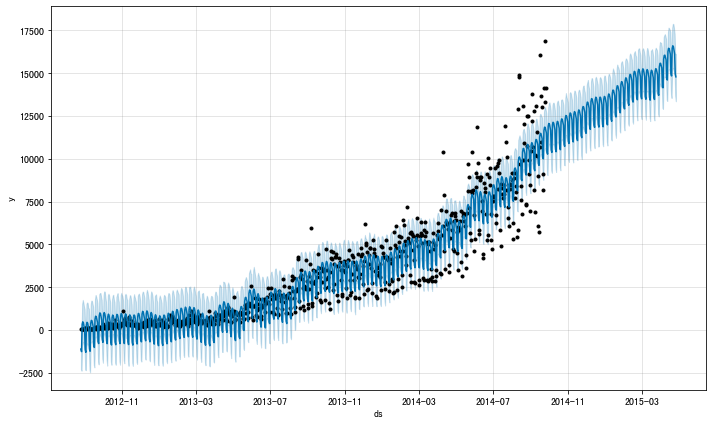

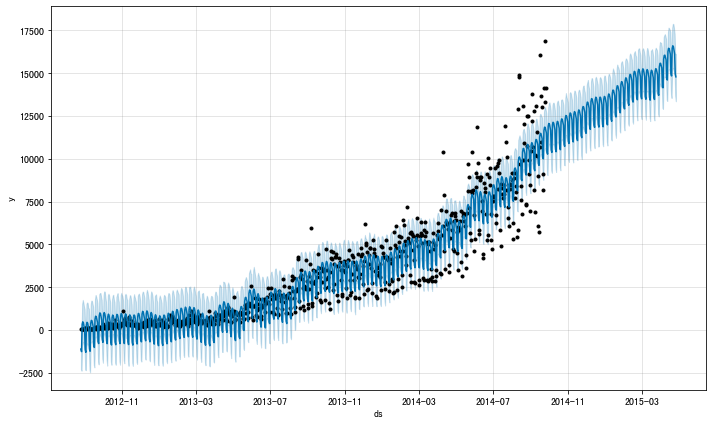

In [26]:
m.plot(forecast)

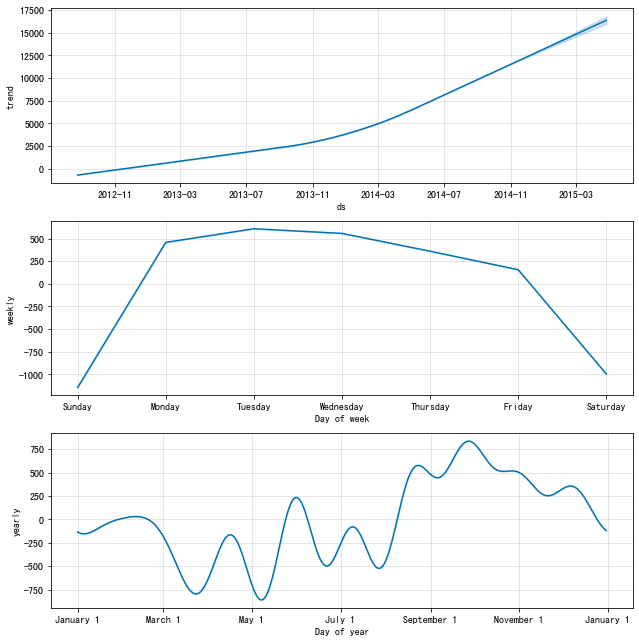

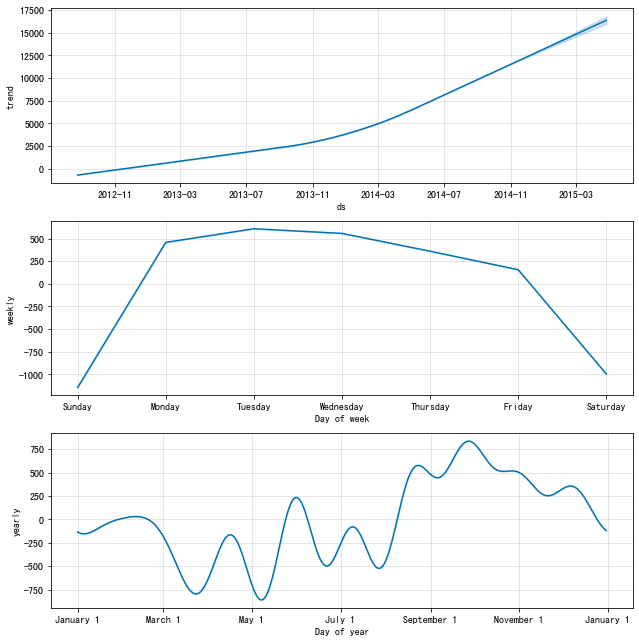

In [27]:
#查看各个components
m.plot_components(forecast)